<a href="https://colab.research.google.com/github/javohir-ergashboyev/ML-projects/blob/main/Batch%2CMiniBatch%2CStochastic_Gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler1=MinMaxScaler()
X=scaler.fit_transform(df[['area','bedrooms']])
y=scaler1.fit_transform(df['price'].values.reshape(df.shape[0], 1))

In [5]:
X.shape

(20, 2)

In [53]:
y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [13]:
X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [95]:
y=y.reshape(20,)

In [96]:
y

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

# Batch **Gradient**

In [107]:
def batch_gradiend(y_true,x, lr=0.01, epochs=500):
  features=x.shape[1]
  w=np.ones(shape=(features))
  n=x.shape[0]
  b=0

  epoch_list=[]
  cost_list=[]
  for i in range(epochs):
    y_p=np.dot(w,x.T)+b
    w_d = -(2/n)*(x.T.dot(y_true-y_p))
    b_d = -(2/n)*np.sum(y_true-y_p)
    w=w-lr*w_d
    b=b-lr*b_d

    loss=np.mean(np.square(y_true-y_p))
    if i%10==0:
        cost_list.append(loss)
        epoch_list.append(i)
  return w, b, loss, epoch_list, cost_list


In [108]:
w, b, loss, e_l, c_l=batch_gradiend(y, X, 0.001, 2000)
w1,w2=w
print(f'w1={w1}, w2={w2}, bias={b}')
print('{} loss'.format(loss))

w1=0.7765216394194826, w2=0.7459082188846411, bias=-0.29265802135391156
0.011577843376846069 loss


In [78]:
def f_predict(area, bedroms):
  return w1*area+w2*bedroms+b
f_predict(0.08827586,0.25)
#code gives us wrong negative result because of scaler

-0.03763285110438658

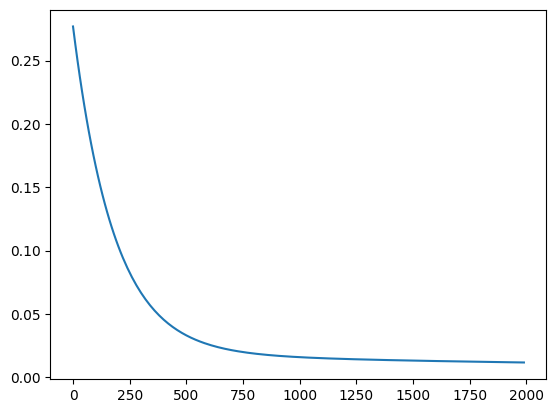

In [72]:
plt.plot(e_l,c_l)
plt.show()

In [23]:
a=np.array([[1,2],[3,5],[6,7]])
a
b=np.array([100,2])

In [26]:
b

array([100,   2])

In [27]:
a.T

array([[1, 3, 6],
       [2, 5, 7]])

In [29]:
np.dot(b,a.T)

array([104, 310, 614])

# **Stochastic Gradient**

In [75]:
import random
random.randint(0,10)

3

In [153]:
def stc_gradient(y_true, x, lr=0.01, epochs=500):
  n=x.shape[0]
  w=np.ones(shape=(x.shape[1]))
  c_l=[]
  e_l=[]
  b=0
  for i in range(epochs):
    random_index = random.randint(0,n-1)
    sample_x = x[random_index]
    sample_y = y_true[random_index]

    y_p=np.dot(w,sample_x.T)+b
    w_d = -(2/n)*(sample_x.T.dot(sample_y-y_p))
    b_d = -(2/n)*(sample_y-y_p)

    w=w-lr*w_d
    b=b-lr*b_d

    loss=np.square(sample_y-y_p)
    if i%10==0:
      e_l.append(i)
      c_l.append(loss)
  return w, b, loss, e_l, c_l

In [154]:
w_sc, b_sc, loss_sc, e_l_sc, c_l_sc=stc_gradient(y, X)

print(f'w1={w_sc[0]}, w2={w_sc[1]}, bias={b_sc}')
print('{} loss'.format(loss_sc))

w1=0.9152255292353358, w2=0.8961600920405872, bias=-0.17384674675369477
0.07617081769800937 loss


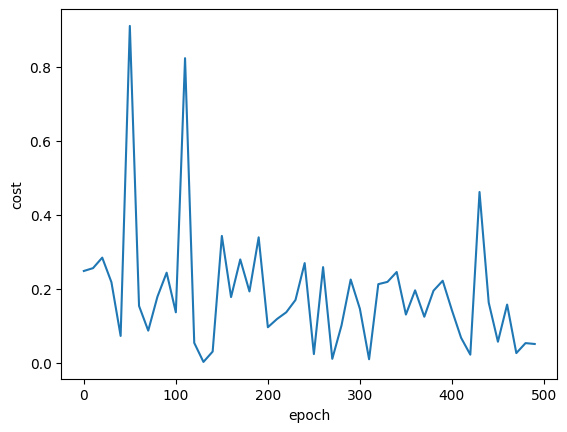

In [89]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(e_l_sc,c_l_sc)

In [97]:
def predict(area,bedrooms,w,b):
    scaled_X = scaler.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return scaler1.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w_sc,b_sc)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


176.67808229768062

# **Mini Batch Gradient**

In [143]:
def mb_gradient(y_true, x, lr=0.01, epochs=500):
  n=x.shape[0]
  w=np.ones(shape=(x.shape[1]))
  val_num=x.shape[0]
  c_l=[]
  e_l=[]
  b=0
  for i in range(epochs):
    random_indexs = np.random.choice(np.random.permutation(n), size=(val_num//5,), replace=False)
    sample_x=x[random_indexs,]
    sample_y=y_true[random_indexs,]

    y_p=np.dot(w, sample_x.T)+b

    w_d=-(2/n)*sample_x.T.dot(sample_y-y_p)
    b_d=-(2/n)*np.sum(sample_y-y_p)

    w=w-lr*w_d
    b=b-lr*b_d
    loss=np.mean(np.square(sample_y-y_p))
    if i%50==0:
      c_l.append(loss)
      e_l.append(i)

  return w, b, loss, e_l, c_l


In [155]:
w_mb,b_mb, loss_mb,e_l_mb,c_l_mb=mb_gradient(y,X)
print(f'w1={w_mb[0]}, w2={w_mb[1]}, bias={b_mb}')
print('{} loss'.format(loss_mb))


w1=0.8201807363779164, w2=0.7885104281495217, bias=-0.29883083913910635
0.006703986805856347 loss


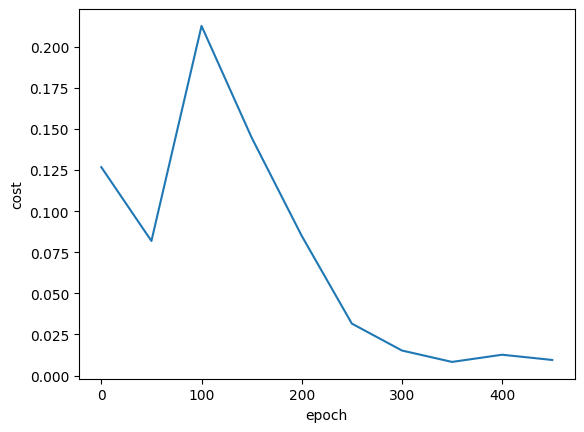

In [145]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(e_l_mb,c_l_mb)